<a href="https://colab.research.google.com/github/laffertybrian/food-sales-predictions/blob/main/food_sales_prediction_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Food Sales Prediction Project

###Importing libraries and data file

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filename = '/content/drive/MyDrive/01 Python for Data Science/sales_predictions.csv'

sales_predictions_df = pd.read_csv(filename)
sales_predictions_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###Exploring the dataframe

In [3]:
# Finding the shape of the dataframe
sales_predictions_df.shape
# has 8523 rows and 12 columns

(8523, 12)

In [4]:
# Learning more about the datatypes of the variables
sales_predictions_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
# Checking data for duplicate values
sales_predictions_df.duplicated().sum()
# There are no duplicated rows

0

In [6]:
# Looking at the info of the dataframe
sales_predictions_df.info()
# Item weight and outlet size seem to have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Another way to view missing values
sales_predictions_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###Addressing Missing Values

Understanding Outlet_Size and if other data within the dataframe could be used to fill the missing data.



In [8]:
# Viewing information contained within the Outlet_Size column
sales_predictions_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
# Exploring data to see if data has a clue to correcting missing values
sales_predictions_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [10]:
# Exploring outlet size to see if it can show us more about outlet type
sales_predictions_df.groupby(['Outlet_Size', 'Outlet_Type'])['Outlet_Size'].count()

Outlet_Size  Outlet_Type      
High         Supermarket Type1     932
Medium       Supermarket Type1     930
             Supermarket Type2     928
             Supermarket Type3     935
Small        Grocery Store         528
             Supermarket Type1    1860
Name: Outlet_Size, dtype: int64

In [11]:
# Exploring outlet size compared to outlet location type
sales_predictions_df.groupby(['Outlet_Size', 'Outlet_Location_Type'])['Outlet_Size'].count()

Outlet_Size  Outlet_Location_Type
High         Tier 3                   932
Medium       Tier 1                   930
             Tier 3                  1863
Small        Tier 1                  1458
             Tier 2                   930
Name: Outlet_Size, dtype: int64

In [12]:
# Putting the information known in the dataframe to help fill in missing values
sales_predictions_df.groupby(['Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type'])['Outlet_Size'].count()

Outlet_Size  Outlet_Type        Outlet_Location_Type
High         Supermarket Type1  Tier 3                  932
Medium       Supermarket Type1  Tier 1                  930
             Supermarket Type2  Tier 3                  928
             Supermarket Type3  Tier 3                  935
Small        Grocery Store      Tier 1                  528
             Supermarket Type1  Tier 1                  930
                                Tier 2                  930
Name: Outlet_Size, dtype: int64

In [13]:
#sales_predictions_df.groupby(['Outlet_Size', 'Outlet_Identifier', 'Outlet_Type', 'Outlet_Location_Type'])['Outlet_Size'].count()

After exploring the data it seems that columns Outlet_Type and Outlet_Location_Type can be used to potentially fill in the missing data from Outlet_Size.

In [14]:
# Getting a subset of data from the dataframe where supermarket type 1 and tier 3
# if there are any na values in the outlet size in this set they should be high
outlet_type_supermarket1 = sales_predictions_df['Outlet_Type'] == 'Supermarket Type1'
outlet_location_type_t3 = sales_predictions_df['Outlet_Location_Type'] == 'Tier 3'

# none meet this criteria

outlet_type_supermarket2 = sales_predictions_df['Outlet_Type'] == 'Supermarket Type2'
test_medium2 = sales_predictions_df.loc[outlet_type_supermarket2, :]

# na outlet field search
outlet_size_na_filter = sales_predictions_df['Outlet_Size'].isna()
outlet_size_na = sales_predictions_df.loc[outlet_size_na_filter, :]



In [15]:
# finding supermarket type1 and tier 2
outlet_location_type_t2 = sales_predictions_df['Outlet_Location_Type'] == 'Tier 2'
test_small_smt1_t2 = sales_predictions_df.loc[outlet_type_supermarket1 & outlet_location_type_t2, :]
test_small_smt1_t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785 entries, 8 to 8520
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            2785 non-null   object 
 1   Item_Weight                2785 non-null   float64
 2   Item_Fat_Content           2785 non-null   object 
 3   Item_Visibility            2785 non-null   float64
 4   Item_Type                  2785 non-null   object 
 5   Item_MRP                   2785 non-null   float64
 6   Outlet_Identifier          2785 non-null   object 
 7   Outlet_Establishment_Year  2785 non-null   int64  
 8   Outlet_Size                930 non-null    object 
 9   Outlet_Location_Type       2785 non-null   object 
 10  Outlet_Type                2785 non-null   object 
 11  Item_Outlet_Sales          2785 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 282.9+ KB


In the dataframe Outlet_Size with the 'Small' value has certain creiteria based on Outlet_Type and Outlet_Location_Type. If there are missing values that also share these same criteria, it would be reasonable to fill in the missing values based on these findings.

No other Outlet_Size besides 'Small' contains the Outlet_Type equal to 'Grocery Store'. Also no other Outlet_Size besides 'Small' is associated with Outlet_Type 'Supermarket Type1' and Outlet_Location_Type 'Tier 2'.

In [16]:
# testing to replace nan values with small in this category
test_small_smt1_t2['Outlet_Size'].fillna('Small', inplace = True)
test_small_smt1_t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785 entries, 8 to 8520
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            2785 non-null   object 
 1   Item_Weight                2785 non-null   float64
 2   Item_Fat_Content           2785 non-null   object 
 3   Item_Visibility            2785 non-null   float64
 4   Item_Type                  2785 non-null   object 
 5   Item_MRP                   2785 non-null   float64
 6   Outlet_Identifier          2785 non-null   object 
 7   Outlet_Establishment_Year  2785 non-null   int64  
 8   Outlet_Size                2785 non-null   object 
 9   Outlet_Location_Type       2785 non-null   object 
 10  Outlet_Type                2785 non-null   object 
 11  Item_Outlet_Sales          2785 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 282.9+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
# replaced nan values based on insight from the dataframe
# specifically 'Outlet_Type' to be Supermarket Type 1 and 'Outlet_Location_Size' to be Tier 2
df = sales_predictions_df
sales_predictions_df.loc[(df['Outlet_Type'] == 'Supermarket Type1') & (df['Outlet_Location_Type'] == 'Tier 2') & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Small'
sales_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                7968 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
# searching for gorcery stores
grocery_filter = sales_predictions_df["Outlet_Type"] == "Grocery Store"
grocery_df = sales_predictions_df.loc[grocery_filter, :]
# Filling in the values of Outlet_Size based on Outlet_Type being equal to 'Grocery Store'
sales_predictions_df.loc[(df['Outlet_Type'] == 'Grocery Store') & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Small'
sales_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


After applying the patterns found in the data to the missing values in the Outlet_Size column, there are now 0 non-null values.

-- Now beginning to look at the missing data in the Item_Weight column.



In [19]:
# Getting information about the Item_Weight column
sales_predictions_df["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [20]:
# What percentage of the data from the Item Weight column is missing
1 - (7060 / 8523)

0.17165317376510614

I am choosing to replace the missing data in the Item_Weight column with the mean based on the flowing:

*   17% is relatively low 
*   I have never made a choice in a Grocery Store/Supermarket based on the items weight. (I am considering myslef a subject matter expert)



In [21]:
# Calculating the mean of the Item_Weight column
item_weight_mean = sales_predictions_df['Item_Weight'].mean()
# Applying the mean to the missing values in the column
sales_predictions_df['Item_Weight'].fillna(item_weight_mean, inplace = True)
# Checking that all values in the dataframe are non-null
sales_predictions_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

All values are non-null in the dataframe.

###Addressing inconsistent category data

In [22]:
# Reviewing the data and looking at each column

# Found an issue with Item Fat Content
sales_predictions_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
# Correcting the syntax differences by using replace method

sales_predictions_df['Item_Fat_Content'] = sales_predictions_df['Item_Fat_Content'].replace('LF', 'Low Fat')
sales_predictions_df['Item_Fat_Content'] = sales_predictions_df['Item_Fat_Content'].replace('low fat', 'Low Fat')
sales_predictions_df['Item_Fat_Content'] = sales_predictions_df['Item_Fat_Content'].replace('reg', 'Regular')
# Printing the value counts again to check data within the column
sales_predictions_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

No other columns had incosistent data.

###Column Summary

Information about each column

In [24]:
# Information for Item Identifier
sales_predictions_df['Item_Identifier'].describe()

count      8523
unique     1559
top       FDW13
freq         10
Name: Item_Identifier, dtype: object

In [25]:
# Information about Item Weight
sales_predictions_df['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [26]:
# Information for Fat Content
sales_predictions_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
# Information for Item Visibility
sales_predictions_df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [28]:
# Information for Item Type
# Counts of the different values
print(sales_predictions_df['Item_Type'].value_counts())
# Number of unique items, top item
sales_predictions_df['Item_Type'].describe()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [29]:
# Information about Item MRP
sales_predictions_df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [30]:
# Information about Outlet Identifier
sales_predictions_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [31]:
# Information about Outlet Establishment Year
sales_predictions_df['Outlet_Establishment_Year'].describe().round(2)

count    8523.00
mean     1997.83
std         8.37
min      1985.00
25%      1987.00
50%      1999.00
75%      2004.00
max      2009.00
Name: Outlet_Establishment_Year, dtype: float64

In [32]:
# Information about Outlet Size
sales_predictions_df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [33]:
# Information about Outlet_Location_Type
sales_predictions_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [34]:
# Information about Outlet Type
sales_predictions_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [35]:
# Information about Item Outlet Sales
sales_predictions_df['Item_Outlet_Sales'].describe().round(2)

count     8523.00
mean      2181.29
std       1706.50
min         33.29
25%        834.25
50%       1794.33
75%       3101.30
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

###Exploratory Visualizations

Heatmaps:

Starting with a general heatmap to look for correlation between variables.

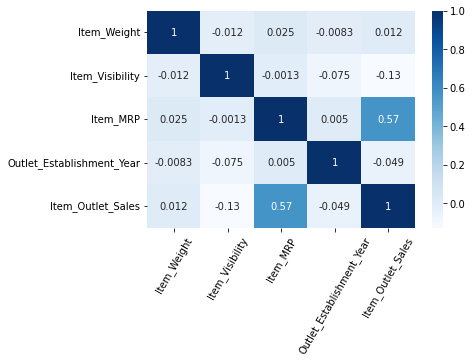

In [36]:
# Start by correlating values
corr_values = sales_predictions_df.corr()
# Creating the heatmap
sns.heatmap(corr_values, cmap = 'Blues', annot = True);
plt.xticks(rotation = 60);

>There is some positive correlation between Item_MSP (the items price) and Item_Outlet_Sales.

Created an additional column called Units_Sold by dividing Item_Outlet_Sales by Item_MRP. Then created a heatmap to see the resutls.

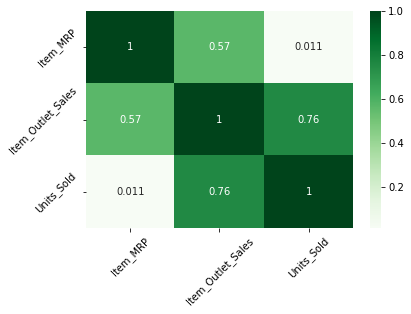

In [37]:
# creating a heatmap for item mrp, outlet sales, and creating a column for units sold
# creating dataframe with data needed
item_sales_map = sales_predictions_df.loc[:,['Item_MRP', 'Item_Outlet_Sales']]
# creating a units sold column
item_sales_map.loc[:,'Units_Sold'] = round(item_sales_map['Item_Outlet_Sales'] / item_sales_map['Item_MRP'])
# calculating correlation
item_sales_map_corr = item_sales_map.corr()
# creating heatmap
sns.heatmap(item_sales_map_corr, cmap = 'Greens', annot = True);
plt.xticks(rotation = 45);
plt.yticks(rotation = 45);

>There is a strong positive correlation to Units_Sold and Item_Outlet_Sales.

Historgram:

Exploring the data and the link between low fat and regular items.

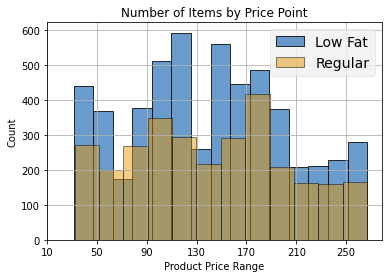

In [38]:
# setting on the columns needed into a new dataframe
type_sales_df = sales_predictions_df[['Item_Type','Item_Outlet_Sales', 'Item_Fat_Content', 'Item_MRP']]

# creating a filter for lowfat items
lowfat_filter = type_sales_df['Item_Fat_Content'] == 'Low Fat'
category_sales_lowfat = type_sales_df.loc[lowfat_filter, :]
# using the opposite of the lowfat filter to get the regular items
category_sales_regular = type_sales_df.loc[~lowfat_filter, :]

# separating the item price for lowfat and regular
category_sales_lowfat_graph = category_sales_lowfat['Item_MRP']
category_sales_regular_graph = category_sales_regular['Item_MRP']

# Graphing the low fat data
category_sales_lowfat_graph.hist(bins = 15, edgecolor = 'black', label='Low Fat', color = '#4482C1', alpha = .80)
# Graphing the regular data
category_sales_regular_graph.hist(bins = 12, edgecolor = 'black', color = '#e69500', label='Regular', alpha=0.48)

# Creating x label and y label
plt.xlabel('Product Price Range')
plt.ylabel('Count')

# Creating title for the histogram
plt.title('Number of Items by Price Point')

# Trying a style
plt.style.use('fivethirtyeight')

# Setting the number of ticks on the x axis
plt.xticks(range(10,255,40));

# Creating a legend for the chart
plt.legend();

>In this chart it is clear to see that there are more items in the low fat category at most price points.

Grouped Bar Chart:

Creating a grouped bar chart to continue the exploration of low fat and regular products.

In [39]:
# Create a chart to show how much more money is generated from Low Fat compared to Regular

# creating dataframe with specefic data
category_sales = sales_predictions_df.loc[:, ['Item_Type', 'Item_Fat_Content', 'Item_Outlet_Sales']]
# creating a dataframe because four categories do not have items bucketed as regular.
# by adding them into the dataframe I am able to graph the data comparatively
adding_these = {'Item_Type': ['Health and Hygiene', 'Hard Drinks', 'Household', 'Others'], 
                'Item_Fat_Content': ['Regular', 'Regular', 'Regular', 'Regular'],
                'Item_Outlet_Sales': [0, 0, 0, 0]}
adding_df = pd.DataFrame(adding_these)
category_sales_complete = pd.concat([category_sales, adding_df])

#making lowfat filter and dataframe
lowfat_filter1 = category_sales_complete['Item_Fat_Content'] == 'Low Fat'
lowfat_content = category_sales_complete[lowfat_filter1]
category_sales_lowfat_content = lowfat_content.groupby('Item_Type')['Item_Outlet_Sales'].sum()
category_sales_lowfat_content.to_frame()
# creating a regular filter and dataframe
regular_content = category_sales_complete[~lowfat_filter1]
category_sales_regular_content = regular_content.groupby('Item_Type')['Item_Outlet_Sales'].sum()
category_sales_regular_content.to_frame();


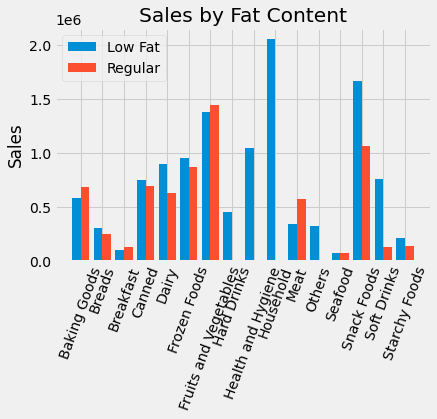

In [40]:
# creating a double bar graph of above infomation
labels = category_sales_regular_content.index

# creating different arrays to graph lowfat and regular
lowfat_values = category_sales_lowfat_content.values
regular_values = category_sales_regular_content.values

# making sure that the labels fit on the x axis
x = np.arange(len(labels))
# controling the width of the bars
width = 0.40

# creating the graph
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lowfat_values, width, label='Low Fat')
rects2 = ax.bar(x + width/2, regular_values, width, label='Regular')

# Adding labels for y axis, creating title, legend, and making x axis labels readable
ax.set_ylabel('Sales')
ax.set_title('Sales by Fat Content')
plt.xticks(x, labels, rotation = 70)
ax.legend();

>This chart shows the breakdown of lowfat and regular in each category.

Horizontal Bar Chart:

Creating a horizontal bar chart to show how many total units were sold in each category.

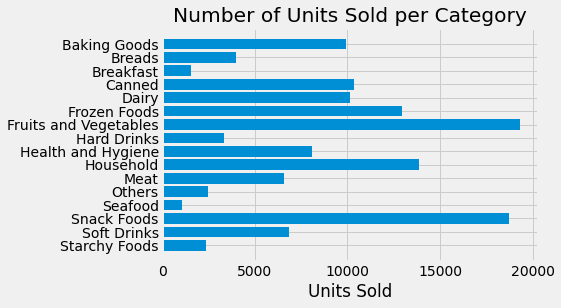

In [41]:
# Creating a column for units sold
units_sold_df = sales_predictions_df
units_sold_df.loc[:,'Units_Sold'] = round(units_sold_df['Item_Outlet_Sales'] / units_sold_df['Item_MRP'])
units_sold_graph = units_sold_df.groupby('Item_Type')['Units_Sold'].sum()
units_sold_graph.to_frame()

# Creating the chart
fig, ax = plt.subplots()

# data for the chart
categories = list(units_sold_graph.index)
y_pos = np.arange(len(categories))
units = units_sold_graph.values

# setting the labels, title and making sure y axis ticks match up with categories
ax.barh(y_pos, units, align='center')
plt.yticks(y_pos, labels=categories)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Units Sold')
ax.set_title('Number of Units Sold per Category');

>This chart shows units sold in each category. 

Stacked Bar Chart:

Creating a stacked bar chart to better understand units sold. This time we will look at each category by Units_Sold.

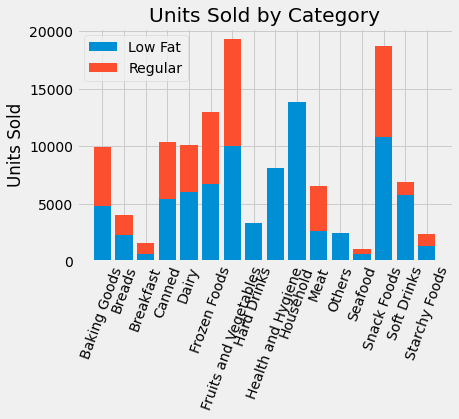

In [42]:
# Filtering the units sold dataframe to get data for item type (low fat and regular)
lowfat_units_sold = units_sold_df[lowfat_filter]
regular_units_sold = units_sold_df[~lowfat_filter]

# adding rows to make sure that the dataframes are the same length
add_these = {'Item_Type': ['Health and Hygiene', 'Hard Drinks', 'Household', 'Others'],
                'Units_Sold': [0, 0, 0, 0]}
add_df = pd.DataFrame(add_these)
regular_units_sold = pd.concat([regular_units_sold, add_df])

# using groupby to organize the data
lowfat_units_sold_graph = lowfat_units_sold.groupby('Item_Type')['Units_Sold'].sum()
regular_units_sold_graph = regular_units_sold.groupby('Item_Type')['Units_Sold'].sum()
lowfat_units_sold_graph.to_frame()
regular_units_sold_graph.to_frame()

# creating the graph
category_labels = lowfat_units_sold_graph.index
lowfat_units = lowfat_units_sold_graph.values
regular_units = regular_units_sold_graph.values


fig, ax = plt.subplots()

ax.bar(category_labels, lowfat_units, label='Low Fat')
ax.bar(category_labels, regular_units, bottom=lowfat_units, label='Regular')

ax.set_ylabel('Units Sold')
ax.set_title('Units Sold by Category')
plt.xticks(x, category_labels, rotation = 70)
ax.legend();

>This chart breaks down the number of units sold by the fat content. 

Boxplots:

Exploring the data within the dataframe with boxplots. 

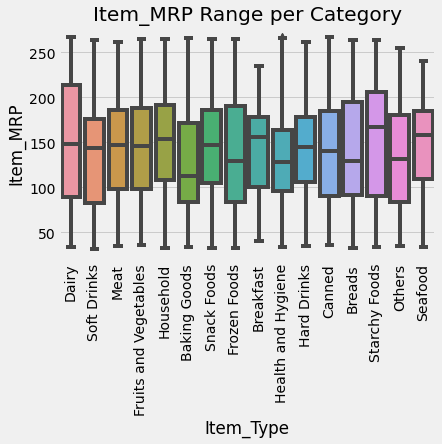

In [43]:
# boxplot on Item MRP data

sns.boxplot(x='Item_Type', y='Item_MRP' , data=sales_predictions_df);
plt.xticks(rotation = 90);
plt.title('Item_MRP Range per Category');

>In this boxplot we can see the range of Item_MRP (retail price) by each category.

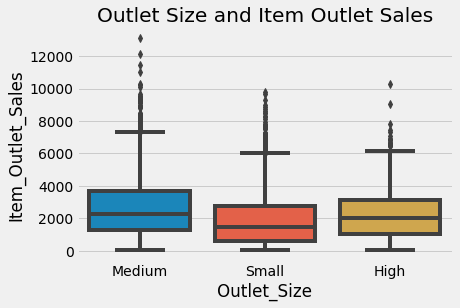

In [44]:
# boxplot on outlet size
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = sales_predictions_df);
plt.title('Outlet Size and Item Outlet Sales');

>This plot shows the item sales at each of the three different outlet sizes.

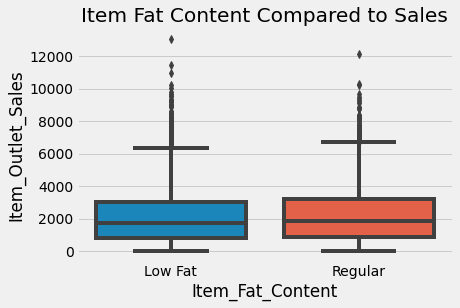

In [45]:
# boxplot for item fat content
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = sales_predictions_df);
plt.title("Item Fat Content Compared to Sales");

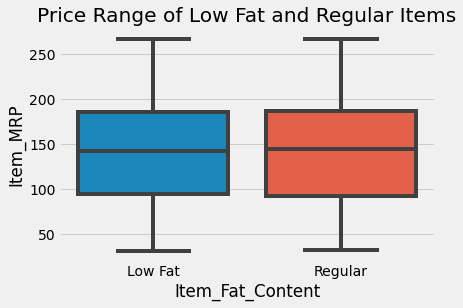

In [46]:
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_MRP', data = sales_predictions_df);
plt.title('Price Range of Low Fat and Regular Items');

Pie Chart:

Using a pie chart to understand sales by Outlet Type.

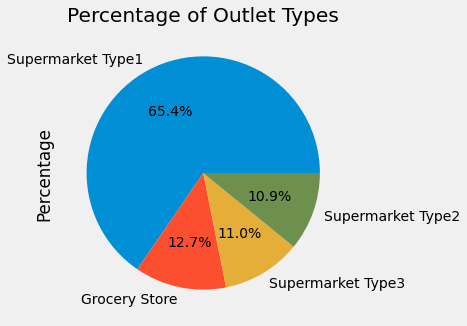

In [47]:
# building the information to graph in a pie chart
outlets = sales_predictions_df['Outlet_Type'].value_counts()
outlets = pd.DataFrame(outlets).reset_index()

outlet_type_percentage = pd.DataFrame()
outlets['Percentage'] = outlets['Outlet_Type'] / 8523

outlets_df = pd.DataFrame({'Outlet_Type_Count': [5577, 1083, 935, 928],
                   'Percentage': [0.654347, 0.127068, 0.109703, 0.108882]},
                  index=['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2'])

plot = outlets_df.plot.pie(y='Percentage', figsize=(5, 5), legend=False, subplots=True, autopct='%1.1f%%')
plt.title('Percentage of Outlet Types');

>The largest group of stores falls into the Supermarket Type 1 category.